In [1]:
#Import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read in the csv raw data file for public education expendtiure
csvfile = pd.read_csv("data_source/raw_data/public_expenditure_education.csv")
#Convert raw data files to Data Frame
raw_df = pd.DataFrame(csvfile)
#Remove the first row and replace with second row
new_header = raw_df.iloc[0]
raw_df = raw_df[1:]
raw_df.columns = new_header 
#Fill in blank column header
raw_df.columns = raw_df.columns.fillna('Country Name')
#Convert Value to float and round
raw_df['Value'] = round(raw_df['Value'].astype(float),2)
raw_df['Year'] = raw_df['Year'].astype(int)
#Remove columns that are not needed (Source, Footnote)
clean_df = raw_df[['Region/Country/Area','Series', 'Country Name','Year','Value']]
clean_df = clean_df.rename(columns={'Region/Country/Area': 'Country ID', 'Value': 'Education Spend (%)', 'Series': 'Education Source Data'})

clean_df = clean_df.loc[clean_df['Education Source Data'].apply(lambda x: x in ['Public expenditure on education (% of government expenditure)'])]
clean_df['Education Source Data'] = clean_df['Education Source Data'].replace('Public expenditure on education (% of government expenditure)', 'Government Expenditure')
clean_df['Education Source Data'] = clean_df['Education Source Data'].replace('Public expenditure on education (% of GDP)', 'GDP')
clean_df =clean_df.reset_index(drop=True)
#Display the data frame

clean_df.head(10)


,Country ID,Education Source Data,Country Name,Year,Education Spend (%)
0,4,Government Expenditure,Afghanistan,2010,17.07
1,4,Government Expenditure,Afghanistan,2015,12.51
2,4,Government Expenditure,Afghanistan,2017,15.66
3,8,Government Expenditure,Albania,2005,11.36
4,8,Government Expenditure,Albania,2007,11.18
5,8,Government Expenditure,Albania,2015,11.32
6,8,Government Expenditure,Albania,2016,13.60
7,12,Government Expenditure,Algeria,2008,11.43
8,24,Government Expenditure,Angola,2005,7.99
9,24,Government Expenditure,Angola,2006,7.45


In [3]:
#Write to csv in output_data
clean_df.to_csv ('data_source/output_data/public_education_clean.csv', index = False, header=True)

In [4]:
# Read in the csv raw data file for Consumer Price Index expendtiure
csvfile2 = pd.read_csv("data_source/raw_data/consumer_price_index.csv", encoding='latin-1')

#Convert raw data files to Data Frame
raw2_df = pd.DataFrame(csvfile2)

#Remove the first row and replace with second row
raw2_header =  raw2_df.iloc[0]
raw2_df = raw2_df[1:]
raw2_df.columns = new_header 

#Fill in blank column header
raw2_df.columns = raw2_df.columns.fillna('Country Name')

#Convert Value to float and Year to int and round
raw2_df['Value'] = round(raw2_df['Value'].astype(float),2)
raw2_df['Year'] = raw2_df['Year'].astype(int)

#Remove columns that are not needed (Source, Footnote)
cpi_df = raw2_df[['Region/Country/Area','Series', 'Country Name','Year','Value']]
cpi_df = cpi_df.rename(columns={'Region/Country/Area': 'Country ID','Value': 'CPI', 'Series': 'Source Data' })

#Rename values in Series
cpi_df = cpi_df.loc[cpi_df['Source Data'].apply(lambda x: x in ['Consumer price index: General'])]
cpi_df['Source Data'] = cpi_df['Source Data'].replace('Consumer price index: General', 'General')
cpi_df =cpi_df.reset_index(drop=True)

#Display the data frame
cpi_df.head(10)

,Country ID,Source Data,Country Name,Year,CPI
0,728,General,South Sudan,2017,4583.71
1,728,General,South Sudan,2016,1592.38
2,862,General,Venezuela (Boliv. Rep. of),2015,772.02
3,760,General,Syrian Arab Republic,2016,662.90
4,112,General,Belarus,2018,480.06
5,112,General,Belarus,2017,459.03
6,760,General,Syrian Arab Republic,2015,448.80
7,112,General,Belarus,2016,433.06
8,112,General,Belarus,2015,386.97
9,454,General,Malawi,2018,382.50


In [5]:
#Write to csv in output_data
cpi_df.to_csv ('data_source/output_data/cpi_clean.csv', index = False, header=True)

In [6]:
# Read in the csv raw data file for GDP & GDP per Capita
csvfile3 = pd.read_csv("data_source/raw_data/gdp_and_gdp_per_capita.csv", encoding='latin-1')

#Convert raw data files to Data Frame
raw3_df = pd.DataFrame(csvfile3)

#Remove the first row and replace with second row
raw3_header =  raw3_df.iloc[0]
raw3_df = raw3_df[1:]
raw3_df.columns = new_header 

#Fill in blank column header
raw3_df.columns = raw3_df.columns.fillna('Country Name')

#Convert Value to float and round
raw3_df['Value'] = pd.to_numeric(raw3_df['Value'], errors='coerce')
raw3_df['Year'] = raw3_df['Year'].astype(int)

#Remove columns that are not needed (Source, Footnote)
gdp_df = raw3_df[['Region/Country/Area','Series', 'Country Name','Year','Value']]
gdp_df = gdp_df.rename(columns={'Region/Country/Area': 'Country ID','Value': 'GDP', 'Series': 'Source Data'})


#Remove Country ID 1 (Totals)
totals = gdp_df[gdp_df['Country ID'] == '1' ].index
gdp_df.drop(totals , inplace=True)

#Rename values in Series column
gdp_df = gdp_df.loc[gdp_df['Source Data'].apply(lambda x: x in ['GDP per capita (US dollars)'])]
gdp_df['Source Data'] = gdp_df['Source Data'].replace('GDP per capita (US dollars)', 'Per Capita')
gdp_df =gdp_df.reset_index(drop=True)


#Create seperate DataFrame for GDP percent
gdp_percent_df =gdp_df.loc[gdp_df['Source Data']== 'GDP real rates of growth (percent)']

#Remove Percent 
percents = gdp_df[gdp_df['Source Data'] == 'GDP real rates of growth (percent)' ].index
gdp_df.drop(percents , inplace=True)

#Display the data frame
gdp_df.head()


,Country ID,Source Data,Country Name,Year,GDP
0,2,Per Capita,Africa,1985,937.0
1,2,Per Capita,Africa,1995,807.0
2,2,Per Capita,Africa,2005,1222.0
3,2,Per Capita,Africa,2010,1877.0
4,2,Per Capita,Africa,2015,1923.0


In [7]:
#Write both Data Frames to csv in output_data folder
gdp_df.to_csv ('data_source/output_data/gdp_clean.csv', index = False, header=True)
gdp_percent_df.to_csv ('data_source/output_data/gdp_percent_clean.csv', index = False, header=True)

In [8]:
# Read in the csv raw data file for R&D as a % of GDP expendtiure
csvfile4 = pd.read_csv("data_source/raw_data/gdp_r&d.csv", encoding='latin-1')

#Convert raw data files to Data Frame
raw4_df = pd.DataFrame(csvfile4)

#Remove the first row and replace with second row
raw4_header =  raw4_df.iloc[0]
raw4_df = raw4_df[1:]
raw4_df.columns = new_header 

#Fill in blank column header
raw4_df.columns = raw4_df.columns.fillna('Country Name')

#Convert Value to float and round
raw4_df['Value'] = pd.to_numeric(raw4_df['Value'], errors='coerce')
raw4_df['Year'] = raw4_df['Year'].astype(int)

#Remove columns that are not needed (Source, Footnote)
rnd_df = raw4_df[['Region/Country/Area','Series', 'Country Name','Year','Value']]
rnd_df = rnd_df.rename(columns={'Region/Country/Area': 'Country ID','Value': 'Expenditure on R&D (%)', 'Series': 'Source Data' })


#Remove Country ID 1 (Totals)
totals = rnd_df[rnd_df['Country ID'] == '1' ].index
rnd_df.drop(totals , inplace=True)

#Rename values in Source column and filter to only High Education
rnd_df = rnd_df.loc[rnd_df['Source Data'].apply(lambda x: x in ['Gross domestic expenditure on R & D: Higher education (%)'])]
rnd_df['Source Data'] = rnd_df['Source Data'].replace('Gross domestic expenditure on R & D: Higher education (%)', 'Higher education (%)')
rnd_df =rnd_df.reset_index(drop=True)



#Display the data frame
rnd_df.head()


,Country ID,Source Data,Country Name,Year,Expenditure on R&D (%)
0,8,Higher education (%),Albania,2008,8.6
1,32,Higher education (%),Argentina,2005,5.7
2,32,Higher education (%),Argentina,2008,4.4
3,32,Higher education (%),Argentina,2015,2.0
4,36,Higher education (%),Australia,2004,0.4


In [9]:
#Write Data Frame to csv in output_data folder
rnd_df.to_csv ('data_source/output_data/rnd_gdp_clean.csv', index = False, header=True)

In [10]:
# Read in the csv raw data file for Crime Rate
csvfile5 = pd.read_csv("data_source/raw_data/crimes.csv", encoding='latin-1')

#Convert raw data files to Data Frame
raw5_df = pd.DataFrame(csvfile5)

#Remove the first row and replace with second row
raw5_header =  raw5_df.iloc[0]
raw5_df = raw5_df[1:]
raw5_df.columns = new_header 

#Fill in blank column header
raw5_df.columns = raw5_df.columns.fillna('Country Name')

#Convert Value to float and round
raw5_df['Value'] = pd.to_numeric(raw5_df['Value'], errors='coerce')
raw5_df['Year'] = raw5_df['Year'].astype(int)

#Remove columns that are not needed (Source, Footnote)
crime_df = raw5_df[['Region/Country/Area','Series', 'Country Name','Year','Value']]
crime_df = crime_df.rename(columns={'Region/Country/Area': 'Country ID','Value': 'Rate per 100,000', 'Series': 'Source Data' })


#Remove Country ID 1 (Totals)
totals = crime_df[crime_df['Country ID'] == '1' ].index
crime_df.drop(totals , inplace=True)

#Rename values in Series column
crime_df = crime_df.loc[crime_df['Source Data'].apply(lambda x: x in ['Intentional homicide rates per 100,000','Theft at the national level, rate per 100,000 population','Assault rate per 100,000 population','Robbery at the national level, rate per 100,000 population','Robbery at the national level, rate per 100,000 population','Total Sexual Violence at the national level, rate per 100,000','Kidnapping at the national level, rate per 100,000'])]
crime_df['Source Data'] = crime_df['Source Data'].replace('Intentional homicide rates per 100,000', 'Homicide (%)')
crime_df['Source Data'] = crime_df['Source Data'].replace('Theft at the national level, rate per 100,000 population', 'Theft (%)')
crime_df['Source Data'] = crime_df['Source Data'].replace('Assault rate per 100,000 population', 'Assault (%)')
crime_df['Source Data'] = crime_df['Source Data'].replace('Robbery at the national level, rate per 100,000 population', 'Robbery (%)')
crime_df['Source Data'] = crime_df['Source Data'].replace('Total Sexual Violence at the national level, rate per 100,000', 'Sexual Violence (%)')
crime_df['Source Data'] = crime_df['Source Data'].replace('Kidnapping at the national level, rate per 100,000', 'Kidnapping (%)')
crime_df =crime_df.reset_index(drop=True)



#Display the data frame
crime_df['Source Data'].unique()

array(['Homicide (%)', 'Assault (%)', 'Theft (%)', 'Robbery (%)',
       'Sexual Violence (%)', 'Kidnapping (%)'], dtype=object)

In [11]:
# Write Data Frame to csv file and save to data_source folder
crime_df.to_csv ('data_source/output_data/crime_clean.csv', index = False, header=True)

In [12]:
# Read in the csv raw data file for Crime Rate
csvfile6 = pd.read_csv("data_source/raw_data/labour_force_unemployment.csv", encoding='latin-1')

#Convert raw data files to Data Frame
raw6_df = pd.DataFrame(csvfile6)

#Remove the first row and replace with second row
raw6_header =  raw6_df.iloc[0]
raw6_df = raw6_df[1:]
raw6_df.columns = new_header 

#Fill in blank column header
raw6_df.columns = raw6_df.columns.fillna('Country Name')

#Convert Value to float and round
raw6_df['Value'] = pd.to_numeric(raw6_df['Value'], errors='coerce')
raw6_df['Year'] = raw6_df['Year'].astype(int)

#Remove columns that are not needed (Source, Footnote)
labor_df = raw6_df[['Region/Country/Area','Series', 'Country Name','Year','Value']]
labor_df = labor_df.rename(columns={'Region/Country/Area': 'Country ID','Value': 'Unemployment Rate (%)', 'Series': 'Source Data' })


#Remove Country ID 1 (Totals)
totals = labor_df[labor_df['Country ID'] == '1' ].index
labor_df.drop(totals , inplace=True)

#Rename values in Series column
labor_df = labor_df.loc[labor_df['Source Data'].apply(lambda x: x in ['Unemployment rate - Total'])]
labor_df['Source Data'] = labor_df['Source Data'].replace('Unemployment rate - Total', 'Total Unemployment')
labor_df =labor_df.reset_index(drop=True)



#Display the data frame
labor_df.head()

,Country ID,Source Data,Country Name,Year,Unemployment Rate (%)
0,2,Total Unemployment,Africa,2005,8.4
1,2,Total Unemployment,Africa,2010,7.9
2,2,Total Unemployment,Africa,2015,7.5
3,2,Total Unemployment,Africa,2019,7.8
4,15,Total Unemployment,Northern Africa,2005,12.5


In [13]:
# Write Data Frame to csv file and save to data_source folder
labor_df.to_csv ('data_source/output_data/labor_clean.csv', index = False, header=True)

In [14]:
#Create Data Frame grouped by Year
#merge_df = pd.merge(file1, file2, on="Country ID")

#Merge Public Expenditure on Education with CPI
public_education_cpi = pd.merge(clean_df, cpi_df, on=["Country ID", "Year", "Country Name"])
public_education_cpi.head()

,Country ID,Education Source Data,Country Name,Year,Education Spend (%),Source Data,CPI
0,4,Government Expenditure,Afghanistan,2010,17.07,General,100.00
1,4,Government Expenditure,Afghanistan,2015,12.51,General,132.12
2,4,Government Expenditure,Afghanistan,2017,15.66,General,144.77
3,8,Government Expenditure,Albania,2005,11.36,General,86.67
4,8,Government Expenditure,Albania,2015,11.32,General,111.40


In [87]:
#Merge Public Education with Crime
public_education_crime = pd.merge(clean_df, crime_df, on=["Country ID", "Year", "Country Name"])
public_education_crime.head()

,Country ID,Education Source Data,Country Name,Year,Education Spend (%),Source Data,"Rate per 100,000"
0,4,Government Expenditure,Afghanistan,2010,17.07,Homicide (%),3.4
1,8,Government Expenditure,Albania,2005,11.36,Homicide (%),5.0
2,8,Government Expenditure,Albania,2005,11.36,Assault (%),5.4
3,8,Government Expenditure,Albania,2005,11.36,Theft (%),97.0
4,8,Government Expenditure,Albania,2005,11.36,Robbery (%),6.5


In [16]:
#Merge Public Education with GDP
public_education_gdp = pd.merge(clean_df, gdp_df, on=["Country ID", "Year", "Country Name"])
public_education_gdp.head()

,Country ID,Education Source Data,Country Name,Year,Education Spend (%),Source Data,GDP
0,4,Government Expenditure,Afghanistan,2010,17.07,Per Capita,558.0
1,4,Government Expenditure,Afghanistan,2015,12.51,Per Capita,611.0
2,4,Government Expenditure,Afghanistan,2017,15.66,Per Capita,619.0
3,8,Government Expenditure,Albania,2005,11.36,Per Capita,2615.0
4,8,Government Expenditure,Albania,2015,11.32,Per Capita,3895.0


In [129]:
#Merge Public Education with GDP Percent
public_education_gdp_percent = pd.merge(clean_df, gdp_percent_df, on=["Country ID", "Year", "Country Name"])
public_education_gdp_percent.head()

,Country ID,Education Source Data,Country Name,Year,Education Spend (%),Source Data,GDP


In [18]:
#Merge Public Education with Labour
public_education_labor = pd.merge(clean_df, labor_df, on=["Country ID", "Year", "Country Name"])
public_education_labor.head()

,Country ID,Education Source Data,Country Name,Year,Education Spend (%),Source Data,Unemployment Rate (%)
0,4,Government Expenditure,Afghanistan,2010,17.07,Total Unemployment,7.8
1,4,Government Expenditure,Afghanistan,2015,12.51,Total Unemployment,8.9
2,8,Government Expenditure,Albania,2005,11.36,Total Unemployment,17.5
3,8,Government Expenditure,Albania,2015,11.32,Total Unemployment,17.1
4,24,Government Expenditure,Angola,2005,7.99,Total Unemployment,21.4


In [19]:
#Merge Public Education with R&D GDP
public_education_rnd_gdp = pd.merge(clean_df, rnd_df, on=["Country ID", "Year", "Country Name"])
public_education_rnd_gdp.head()

,Country ID,Education Source Data,Country Name,Year,Education Spend (%),Source Data,Expenditure on R&D (%)
0,32,Government Expenditure,Argentina,2005,15.81,Higher education (%),5.7
1,40,Government Expenditure,Austria,2015,10.69,Higher education (%),0.6
2,31,Government Expenditure,Azerbaijan,2005,13.22,Higher education (%),0.0
3,31,Government Expenditure,Azerbaijan,2010,8.70,Higher education (%),0.3
4,31,Government Expenditure,Azerbaijan,2016,8.20,Higher education (%),1.4


In [20]:
#Loading into CSV files
public_education_cpi.to_csv('data_source/merge_data/public_education_cpi.csv', index = False, header=True)
public_education_crime.to_csv('data_source/merge_data/public_education_crime.csv', index = False, header=True)
public_education_gdp.to_csv('data_source/merge_data/public_education_gdp.csv', index = False, header=True)
public_education_gdp_percent.to_csv('data_source/merge_data/public_education_gdp_percent.csv', index = False, header=True)
public_education_labor.to_csv('data_source/merge_data/public_education_labor.csv', index = False, header=True)
public_education_rnd_gdp.to_csv('data_source/merge_data/public_education_rnd_gdp.csv', index = False, header=True)

Bar Chart and Scatter Plot for each variable


<Figure size 5760x432 with 0 Axes>

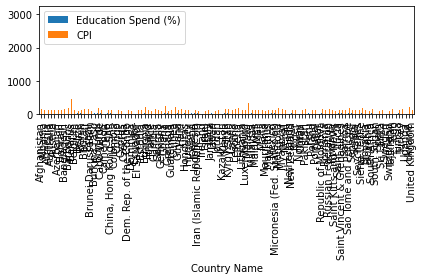

In [76]:
#Bar and Scatter Chart for Education Expense v CPI. 

#Eliminate data prior to 2010
public_education_cpi_clean = public_education_cpi.loc[(public_education_cpi["Year"]>2014)]
#Find the mean for Public Education Expense and CPI and create merged dataframe 
public_education_expense_mean = public_education_cpi_clean.groupby('Country Name').mean()['Education Spend (%)']
cpi_mean = public_education_cpi_clean.groupby('Country Name').mean()['CPI']
education_expense_cpi_df = pd.merge(public_education_expense_mean, cpi_mean, on='Country Name')

#Create Bar Chart
plt.figure(figsize = (80,6))
education_expense_cpi_df.plot.bar()
plt.tight_layout()
plt.show()




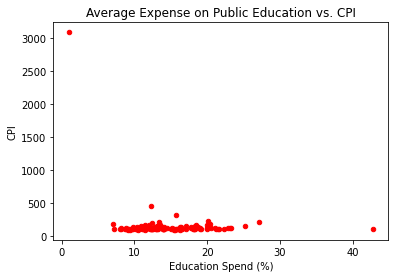

In [82]:
#Create Scatter Chart - CPI
education_expense_cpi_df.plot(kind='scatter', x='Education Spend (%)', y='CPI', title='Average Expense on Public Education vs. CPI', marker='o', color='r')
plt.show()

<Figure size 5760x432 with 0 Axes>

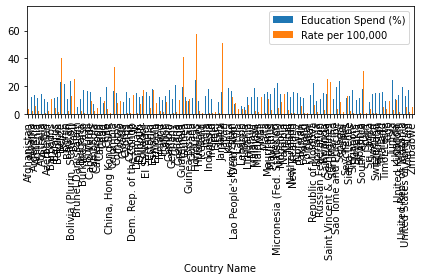

In [112]:
#Bar and Scatter Chart for Education Expense v Homicide Rates. 

#Eliminate data prior to 2010
public_education_crime_clean = public_education_crime.loc[(public_education_crime["Year"]>2009)]
#Find the mean for Public Education Expense and homicide and create merged dataframe 
public_education_homicide_clean = public_education_crime_clean.loc[(public_education_crime_clean['Source Data']=='Homicide (%)')].dropna()
education_expense_homicide_mean = public_education_homicide_clean.groupby('Country Name').mean()['Education Spend (%)']
homicide_mean = public_education_homicide_clean.groupby('Country Name').mean()['Rate per 100,000']
education_expense_homicide_df = pd.merge(public_education_expense_homicide_mean, homicide_mean, on='Country Name')

#Create Bar Chart
plt.figure(figsize = (80,6))
education_expense_homicide_df.plot.bar()
plt.tight_layout()
plt.show()



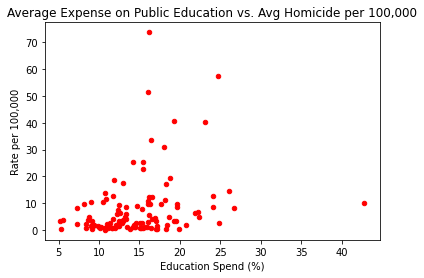

In [109]:
#Create Scatter Chart - Homicide
education_expense_homicide_df.plot(kind='scatter', x='Education Spend (%)', y='Rate per 100,000', title='Average Expense on Public Education vs. Avg Homicide per 100,000', marker='o', color='r')
plt.show()

<Figure size 5760x432 with 0 Axes>

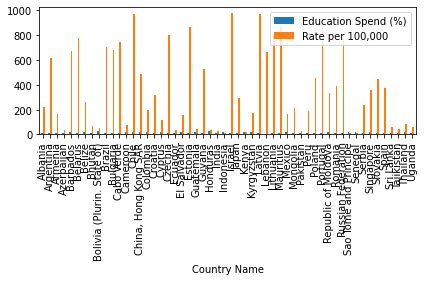

In [106]:
#Bar and Scatter Chart for Education Expense v Theft Rates. 

#Eliminate data prior to 2010
public_education_crime_clean = public_education_crime.loc[(public_education_crime["Year"]>2009)]
#Find the mean for Public Education Expense and theft and create merged dataframe 
public_education_theft_clean = public_education_crime_clean.loc[(public_education_crime_clean['Source Data']=='Theft (%)')].dropna()
education_expense_theft_mean = public_education_theft_clean.groupby('Country Name').mean()['Education Spend (%)']
theft_mean = public_education_theft_clean.groupby('Country Name').mean()['Rate per 100,000']
education_expense_theft_df = pd.merge(education_expense_theft_mean, theft_mean, on='Country Name')

#Create Bar Chart
plt.figure(figsize = (80,6))
education_expense_theft_df.plot.bar()
plt.tight_layout()
plt.show()


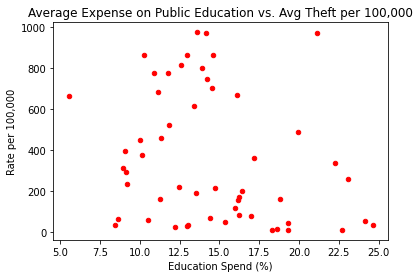

In [108]:
#Create Scatter Chart - Theft
education_expense_theft_df.plot(kind='scatter', x='Education Spend (%)', y='Rate per 100,000', title='Average Expense on Public Education vs. Avg Theft per 100,000', marker='o', color='r')
plt.show()

<Figure size 5760x432 with 0 Axes>

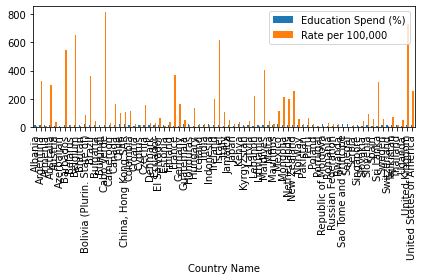

In [110]:
#Bar and Scatter Chart for Education Expense v Assault Rates. 

#Eliminate data prior to 2010
public_education_crime_clean = public_education_crime.loc[(public_education_crime["Year"]>2009)]
#Find the mean for Public Education Expense and assault and create merged dataframe 
public_education_assault_clean = public_education_crime_clean.loc[(public_education_crime_clean['Source Data']=='Assault (%)')].dropna()
education_expense_assault_mean = public_education_assault_clean.groupby('Country Name').mean()['Education Spend (%)']
assault_mean = public_education_assault_clean.groupby('Country Name').mean()['Rate per 100,000']
education_expense_assault_df = pd.merge(education_expense_assault_mean, assault_mean, on='Country Name')

#Create Bar Chart
plt.figure(figsize = (80,6))
education_expense_assault_df.plot.bar()
plt.tight_layout()
plt.show()

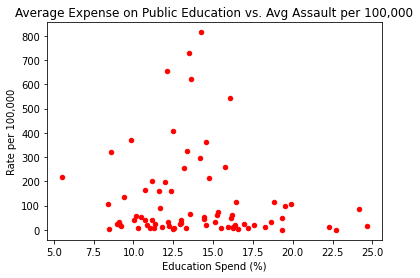

In [111]:
#Create Scatter Chart - Assault
education_expense_assault_df.plot(kind='scatter', x='Education Spend (%)', y='Rate per 100,000', title='Average Expense on Public Education vs. Avg Assault per 100,000', marker='o', color='r')
plt.show()

<Figure size 5760x432 with 0 Axes>

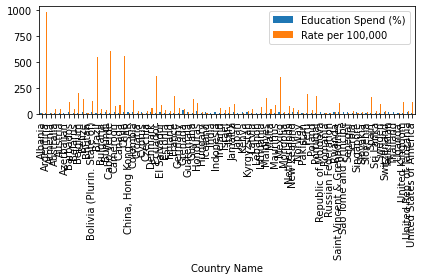

In [117]:
#Bar and Scatter Chart for Education Expense v Robbery Rates. 

#Eliminate data prior to 2010
public_education_crime_clean = public_education_crime.loc[(public_education_crime["Year"]>2009)]
#Find the mean for Public Education Expense and robbery and create merged dataframe 
public_education_robbery_clean = public_education_crime_clean.loc[(public_education_crime_clean['Source Data']=='Robbery (%)')].dropna()
education_expense_robbery_mean = public_education_robbery_clean.groupby('Country Name').mean()['Education Spend (%)']
robbery_mean = public_education_robbery_clean.groupby('Country Name').mean()['Rate per 100,000']
education_expense_robbery_df = pd.merge(education_expense_robbery_mean, robbery_mean, on='Country Name')

#Create Bar Chart
plt.figure(figsize = (80,6))
education_expense_robbery_df.plot.bar()
plt.tight_layout()
plt.show()



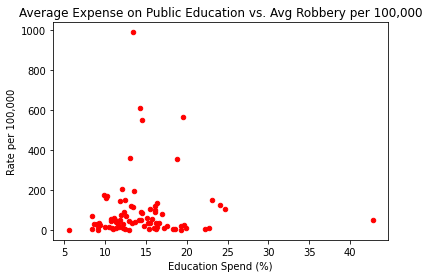

In [118]:
#Create Scatter Chart - Robbery
education_expense_robbery_df.plot(kind='scatter', x='Education Spend (%)', y='Rate per 100,000', title='Average Expense on Public Education vs. Avg Robbery per 100,000', marker='o', color='r')
plt.show()

<Figure size 5760x432 with 0 Axes>

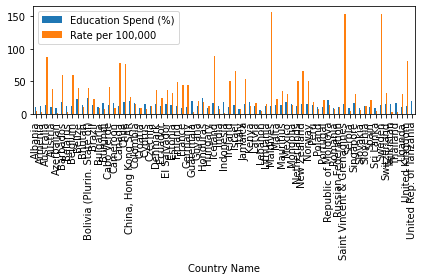

In [119]:
#Bar and Scatter Chart for Education Expense v Sexual Violence Rates. 

#Eliminate data prior to 2010
public_education_crime_clean = public_education_crime.loc[(public_education_crime["Year"]>2009)]
#Find the mean for Public Education Expense and sexual violence and create merged dataframe 
public_education_sex_violence_clean = public_education_crime_clean.loc[(public_education_crime_clean['Source Data']=='Sexual Violence (%)')].dropna()
education_expense_sex_violence_mean = public_education_sex_violence_clean.groupby('Country Name').mean()['Education Spend (%)']
sex_violence_mean = public_education_sex_violence_clean.groupby('Country Name').mean()['Rate per 100,000']
education_expense_sex_violence_df = pd.merge(education_expense_sex_violence_mean, sex_violence_mean, on='Country Name')

#Create Bar Chart
plt.figure(figsize = (80,6))
education_expense_sex_violence_df.plot.bar()
plt.tight_layout()
plt.show()



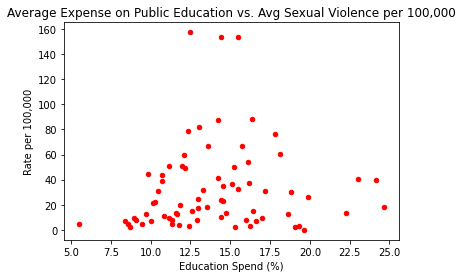

In [120]:
#Create Scatter Chart - Sexual Violence
education_expense_sex_violence_df.plot(kind='scatter', x='Education Spend (%)', y='Rate per 100,000', title='Average Expense on Public Education vs. Avg Sexual Violence per 100,000', marker='o', color='r')
plt.show()

<Figure size 5760x432 with 0 Axes>

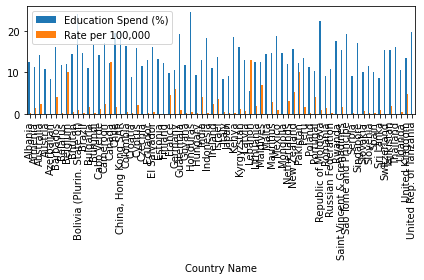

In [121]:
#Bar and Scatter Chart for Education Expense v Kidnapping Rates. 

#Eliminate data prior to 2010
public_education_crime_clean = public_education_crime.loc[(public_education_crime["Year"]>2009)]
#Find the mean for Public Education Expense and kidnapping and create merged dataframe 
public_education_kidnapping_clean = public_education_crime_clean.loc[(public_education_crime_clean['Source Data']=='Kidnapping (%)')].dropna()
education_expense_kidnapping_mean = public_education_kidnapping_clean.groupby('Country Name').mean()['Education Spend (%)']
kidnapping_mean = public_education_kidnapping_clean.groupby('Country Name').mean()['Rate per 100,000']
education_expense_kidnapping_df = pd.merge(education_expense_kidnapping_mean, kidnapping_mean, on='Country Name')

#Create Bar Chart
plt.figure(figsize = (80,6))
education_expense_kidnapping_df.plot.bar()
plt.tight_layout()
plt.show()


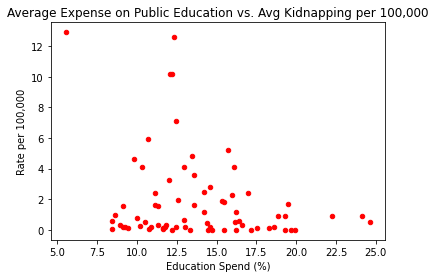

In [122]:
#Create Scatter Chart - Kidnapping
education_expense_kidnapping_df.plot(kind='scatter', x='Education Spend (%)', y='Rate per 100,000', title='Average Expense on Public Education vs. Avg Kidnapping per 100,000', marker='o', color='r')
plt.show()

<Figure size 5760x432 with 0 Axes>

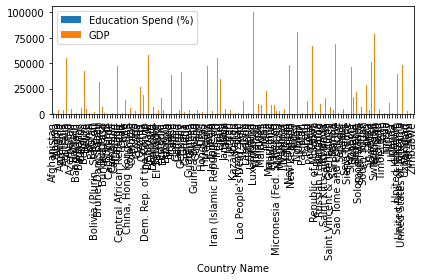

In [126]:
#Bar and Scatter Chart for Education Expense v GDP. 

#Eliminate data prior to 2010
public_education_gdp_clean = public_education_gdp.loc[(public_education_gdp["Year"]>2009)]
#Find the mean for Public Education Expense and GDP and create merged dataframe 
public_education_expense_gdp_mean = public_education_gdp_clean.groupby('Country Name').mean()['Education Spend (%)']
gdp_mean = public_education_gdp_clean.groupby('Country Name').mean()['GDP']
education_expense_gdp_df = pd.merge(public_education_expense_gdp_mean, gdp_mean, on='Country Name')

#Create Bar Chart
plt.figure(figsize = (80,6))
education_expense_gdp_df.plot.bar()
plt.tight_layout()
plt.show()



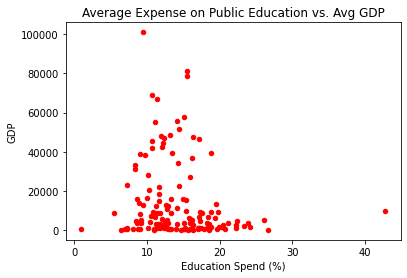

In [128]:
#Create Scatter Chart - GDP
education_expense_gdp_df.plot(kind='scatter', x='Education Spend (%)', y='GDP', title='Average Expense on Public Education vs. Avg GDP', marker='o', color='r')
plt.show()

No Data for GDP Percent

In [130]:
# #Bar and Scatter Chart for Education Expense v GDP Percent 

# #Eliminate data prior to 2010
# public_education_gdp_percent_clean = public_education_gdp_percent.loc[(public_education_gdp_percent["Year"]>2009)]
# #Find the mean for Public Education Expense and GDP Percent and create merged dataframe 
# public_education_expense_gdp_percent_mean = public_education_gdp_percent_clean.groupby('Country Name').mean()['Education Spend (%)']
# gdp_percent_mean = public_education_gdp_percent_clean.groupby('Country Name').mean()['GDP']
# education_expense_gdp_df = pd.merge(public_education_expense_gdp_mean, gdp_mean, on='Country Name')

# #Create Bar Chart
# plt.figure(figsize = (80,6))
# education_expense_gdp_df.plot.bar()
# plt.tight_layout()
# plt.show()



In [131]:
# #Create Scatter Chart - GDP Percent
# education_expense_gdp_df.plot(kind='scatter', x='Education Spend (%)', y='GDP', title='Average Expense on Public Education vs. Avg GDP', marker='o', color='r')
# plt.show()

<Figure size 5760x432 with 0 Axes>

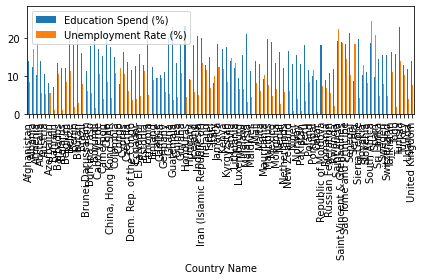

In [80]:
#Bar and Scatter Chart for Education Expense v Unemployment Rate. 

#Eliminate data prior to 2010
public_education_labor_clean = public_education_labor.loc[(public_education_labor["Year"]>2009)]
#Find the mean for Public Education Expense and the unemployment rate and create merged dataframe 
public_education_expense_labor_mean = public_education_cpi_clean.groupby('Country Name').mean()['Education Spend (%)']
labor_mean = public_education_labor_clean.groupby('Country Name').mean()['Unemployment Rate (%)']
education_expense_labor_df = pd.merge(public_education_expense_mean, labor_mean, on='Country Name')

#Create Bar Chart
plt.figure(figsize = (80,6))
education_expense_labor_df.plot.bar()
plt.tight_layout()
plt.show()



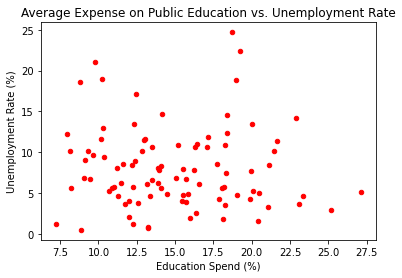

In [81]:
#Create Scatter Chart - Unemployment
education_expense_labor_df.plot(kind='scatter', x='Education Spend (%)', y='Unemployment Rate (%)', title='Average Expense on Public Education vs. Unemployment Rate', marker='o', color='r')
plt.show()

<Figure size 5760x432 with 0 Axes>

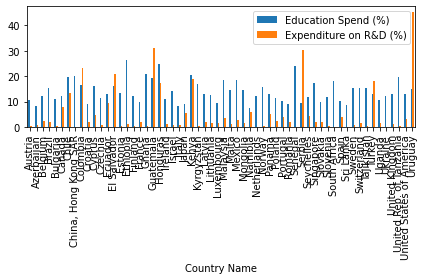

In [136]:
#Bar and Scatter Chart for Education Expense v R&D

#Eliminate data prior to 2010
public_education_rnd_clean = public_education_rnd_gdp.loc[(public_education_rnd_gdp["Year"]>2009)]
#Find the mean for Public Education Expense and R&D and create merged dataframe 
public_education_expense_rnd_mean = public_education_rnd_clean.groupby('Country Name').mean()['Education Spend (%)']
rnd_mean = public_education_rnd_clean.groupby('Country Name').mean()['Expenditure on R&D (%)']
education_expense_rnd_df = pd.merge(public_education_expense_rnd_mean, rnd_mean, on='Country Name')

#Create Bar Chart
plt.figure(figsize = (80,6))
education_expense_rnd_df.plot.bar()
plt.tight_layout()
plt.show()


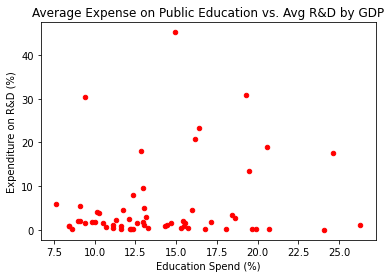

In [137]:
#Create Scatter Chart - R&D 
education_expense_rnd_df.plot(kind='scatter', x='Education Spend (%)', y='Expenditure on R&D (%)', title='Average Expense on Public Education vs. Avg R&D by GDP', marker='o', color='r')
plt.show()